## First average out the 10 runs to eliminate sampling effects

In [1]:
import pickle
from collections import defaultdict
from framework.losses import interpoint_distance
import os
import pandas as pd

In [35]:
SAVE_IMAGES = True
IMAGES_DIR = "./results/img/exp2/"

def clear_folder(path):
    filelist = [f for f in os.listdir(path) if f.endswith("png")]
    for f in filelist:
        os.remove(os.path.join(path, f))
        
def save_image(title, x, y):
    filename = title + ".png"
    plt.title(title)
    plt.plot(x, y)
    plt.savefig(IMAGES_DIR + filename)

In [36]:
RESULTS_DIR = "./results/exp2"
N_RESULT_FILES = 10

def _load(name):
    with open(name, "rb") as f:
        return pickle.load(f)
    
if SAVE_IMAGES:
    clear_folder(IMAGES_DIR)

In [37]:
df = pd.DataFrame(_load('./results/exp2/experimenttwo_1.pkl'))

In [38]:
RESULTS_DIR = "./results/exp2"
N_RESULT_FILES = 10
for filename in os.listdir(RESULTS_DIR):
    print(filename)
    
if len(os.listdir(RESULTS_DIR)) != N_RESULT_FILES:
    print("Some runs are missing please check the results folder")

experimenttwo_5.pkl
experimenttwo_4.pkl
experimenttwo_6.pkl
experimenttwo_7.pkl
experimenttwo_3.pkl
experimenttwo_2.pkl
experimenttwo_1.pkl
experimenttwo_10.pkl
experimenttwo_9.pkl
experimenttwo_8.pkl


In [39]:
def group(results):
    
    def _sort(groups):
        
        sorted_groups = {}
        for key, x in groups.items():
            sorted_groups[key] = sorted(x, key=lambda k: k['size'])
            
        return sorted_groups
    
    groups = defaultdict(list)
    for result in results:
        samp, dataset, algo = result['sampling'], result['dataset'], result['algorithm']
        key = tuple([samp, dataset, algo])
        groups[key].append({
            "emb_x": result['emb_x'],
            "labels": result['labels'],
            "size": result['size']
        })
    return _sort(dict(groups))

In [40]:
def groups_to_interpoint(groups):
    
    def _do_interpoint(arr):
        embeddings = [x['emb_x'] for x in arr]
        interpoints = []
        for i in range(0, len(embeddings) - 1):
            
            #Set j = -1 to look at distance from the ground truth. Set j = i-1 to look at incremental difference.
            j = -1
            
            interpoints.append(interpoint_distance(embeddings[i], embeddings[j]))
        return interpoints
        
    interpoint_groups = {}
    for key, value in groups.items():
        interpoint_groups[key] = _do_interpoint(value)

    return interpoint_groups

In [41]:
def create_average_data(RESULTS_DIR, N_RESULT_FILES, preprocess="interpoint"):
    print("Listing all result files...")
    for filename in os.listdir(RESULTS_DIR):
        print(filename)
    
    if len(os.listdir(RESULTS_DIR)) != N_RESULT_FILES:
        print("Some runs are missing please check the results folder")
    
    print("---------------------------------------------------------")
    
    print("Combining files now....")
    exp1_runs = {}
    i=0
    print("Loading Data...")
    for run in os.listdir(RESULTS_DIR):
        result = _load(os.path.join(RESULTS_DIR, run))
        if preprocess == "interpoint":
            result = groups_to_interpoint(group(result))
        exp1_runs[i] = pd.DataFrame(result)
        i +=1
    
    print("Averaging...")
    averages = exp1_runs[0].copy()
    averages.loc[:,:] = 0
    for i in range(N_RESULT_FILES):
        for j in range(len(averages.columns)):
            averages.iloc[:,j] += exp1_runs[i].iloc[:,j]
    
    averages = averages / N_RESULT_FILES
    
    print("Merge complete!")
    
    return averages





In [42]:
interpoint_results = create_average_data(RESULTS_DIR, N_RESULT_FILES)

Listing all result files...
experimenttwo_5.pkl
experimenttwo_4.pkl
experimenttwo_6.pkl
experimenttwo_7.pkl
experimenttwo_3.pkl
experimenttwo_2.pkl
experimenttwo_1.pkl
experimenttwo_10.pkl
experimenttwo_9.pkl
experimenttwo_8.pkl
---------------------------------------------------------
Combining files now....
Loading Data...
Averaging...
Merge complete!


In [43]:
interpoint_results

random                                                           \
         mnist                       fmnist                    olivetti   
          umap          tsne           umap           tsne         umap   
0  4286.266804  17313.704105   29157.305930  295749.969680  1297.647726   
1  6969.666251  10914.570623   29986.304794  276434.178333   943.997218   
2  4901.424914  10101.429936  302925.098500  177630.472147   383.362385   
3  2202.620551   7689.037609   16913.258996  184377.281795   872.324785   
4  2704.840795   6465.311703   20467.219723  106959.679890   781.326575   
5  1683.323694   3295.809779   11754.671718   78060.490141  1018.801775   
6  6111.825807   2095.816402   12674.189618   65441.996220   630.984333   

                 stratified                                              \
                      mnist                       fmnist                  
          tsne         umap          tsne           umap           tsne   
0  1590.988821  5025.214247  17413.500934   24760.439234  256319.636682   
1  1107.201207  3849.977586  14315.500111   20893.011414  260255.958702   
2  1691.092438  4770.213570   7017.586237  301689.363259  166131.415526   
3  1932.515698  8142.251616   6223.452071   16134.578617  125575.362080   
4  1363.837441  7815.016163   8772.454826   13861.879120   98356.336433   
5  2036.682544  4871.869817   5259.984439   11907.221310   89815.329848   
6  1612.710191  8605.105275   1595.323476    8372.467063   71480.879455   

                             
      olivetti               
          umap         tsne  
0  1028.197554  1878.301385  
1   419.039223  1421.233265  
2   853.278211  1417.213569  
3   295.997851  1933.731717  
4   508.753106  1529.093741  
5   687.724916  1547.613695  
6   376.766000   942.608147

In [44]:
interpoint_results.to_csv('exp2_interpoint_results.csv')

In [45]:
distance_from_truth_results = create_average_data(RESULTS_DIR, N_RESULT_FILES)

Listing all result files...
experimenttwo_5.pkl
experimenttwo_4.pkl
experimenttwo_6.pkl
experimenttwo_7.pkl
experimenttwo_3.pkl
experimenttwo_2.pkl
experimenttwo_1.pkl
experimenttwo_10.pkl
experimenttwo_9.pkl
experimenttwo_8.pkl
---------------------------------------------------------
Combining files now....
Loading Data...
Averaging...
Merge complete!


In [46]:
distance_from_truth_results

random                                                           \
         mnist                       fmnist                    olivetti   
          umap          tsne           umap           tsne         umap   
0  4286.266804  17313.704105   29157.305930  295749.969680  1297.647726   
1  6969.666251  10914.570623   29986.304794  276434.178333   943.997218   
2  4901.424914  10101.429936  302925.098500  177630.472147   383.362385   
3  2202.620551   7689.037609   16913.258996  184377.281795   872.324785   
4  2704.840795   6465.311703   20467.219723  106959.679890   781.326575   
5  1683.323694   3295.809779   11754.671718   78060.490141  1018.801775   
6  6111.825807   2095.816402   12674.189618   65441.996220   630.984333   

                 stratified                                              \
                      mnist                       fmnist                  
          tsne         umap          tsne           umap           tsne   
0  1590.988821  5025.214247  17413.500934   24760.439234  256319.636682   
1  1107.201207  3849.977586  14315.500111   20893.011414  260255.958702   
2  1691.092438  4770.213570   7017.586237  301689.363259  166131.415526   
3  1932.515698  8142.251616   6223.452071   16134.578617  125575.362080   
4  1363.837441  7815.016163   8772.454826   13861.879120   98356.336433   
5  2036.682544  4871.869817   5259.984439   11907.221310   89815.329848   
6  1612.710191  8605.105275   1595.323476    8372.467063   71480.879455   

                             
      olivetti               
          umap         tsne  
0  1028.197554  1878.301385  
1   419.039223  1421.233265  
2   853.278211  1417.213569  
3   295.997851  1933.731717  
4   508.753106  1529.093741  
5   687.724916  1547.613695  
6   376.766000   942.608147

In [47]:
distance_from_truth_results.to_csv('exp2_distance_from_truth_results.csv')

### Now we look at plots!

In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
SAMPLING = ['random', 'stratified']
ALGORITHMS = ['tsne', 'umap']
DATASETS = ['olivetti', 'fmnist', 'mnist']
x_axis = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

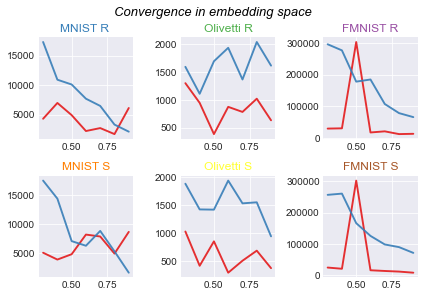

<Figure size 1080x720 with 0 Axes>

In [51]:
# Creating Tile plots
data = distance_from_truth_results
df = pd.DataFrame({
    'x': x_axis,
    'umap (r1)': data['random']['mnist']['umap'],
    'tsne (r1)': data['random']['mnist']['tsne'],
    'umap (r2)': data['random']['olivetti']['umap'],
    'tsne (r2)': data['random']['olivetti']['tsne'], 
    'umap (r3)': data['random']['fmnist']['umap'],
    'tsne (r3)': data['random']['fmnist']['tsne'], 
    'umap (s1)': data['stratified']['mnist']['umap'],
    'tsne (s1)': data['stratified']['mnist']['tsne'], 
    'umap (s2)': data['stratified']['olivetti']['umap'],
    'tsne (s2)': data['stratified']['olivetti']['tsne'], 
    'umap (s3)': data['stratified']['fmnist']['umap'],
    'tsne (s3)': data['stratified']['fmnist']['tsne'], 
    })

title = ["", "MNIST R ", "Olivetti R", "FMNIST R", 
         "MNIST S", "Olivetti S", "FMNIST S"]

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
col=0
skip = False
for column in range(1, len(df.columns)):
    if skip:
        skip = False
        continue
    num+=1
    # Find the right spot on the plot
    plt.subplot(2,3, num)
    plt.plot(df['x'], df.iloc[:,[column]], marker='', color=palette(col), linewidth=1.9, alpha=0.9, label=column)
    plt.plot(df['x'], df.iloc[:,[column+1]], marker='', color=palette(col+1), linewidth=1.9, alpha=0.9, label=column)
    
    # Add title
    plt.tick_params(labelbottom='off')
    plt.title(title[num], loc='center', fontsize=12, fontweight=0, color=palette(num))
    #plt.figure(figsize=(5,5))
    skip = True
    
# general title
plt.suptitle("Convergence in embedding space", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.tight_layout()
plt.figure(figsize=(15,10)) 

plt.savefig(IMAGES_DIR + "Convergence in embedding space.png")

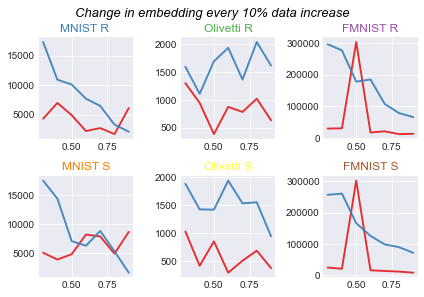

<Figure size 1080x720 with 0 Axes>

In [52]:
# Creating Tile plots
data = interpoint_results
df = pd.DataFrame({
    'x': x_axis,
    'umap (r1)': data['random']['mnist']['umap'],
    'tsne (r1)': data['random']['mnist']['tsne'],
    'umap (r2)': data['random']['olivetti']['umap'],
    'tsne (r2)': data['random']['olivetti']['tsne'], 
    'umap (r3)': data['random']['fmnist']['umap'],
    'tsne (r3)': data['random']['fmnist']['tsne'], 
    'umap (s1)': data['stratified']['mnist']['umap'],
    'tsne (s1)': data['stratified']['mnist']['tsne'], 
    'umap (s2)': data['stratified']['olivetti']['umap'],
    'tsne (s2)': data['stratified']['olivetti']['tsne'], 
    'umap (s3)': data['stratified']['fmnist']['umap'],
    'tsne (s3)': data['stratified']['fmnist']['tsne'], 
    })

title = ["", "MNIST R ", "Olivetti R", "FMNIST R", 
         "MNIST S", "Olivetti S", "FMNIST S"]

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
col=0
skip = False
for column in range(1, len(df.columns)):
    if skip:
        skip = False
        continue
    num+=1
    # Find the right spot on the plot
    plt.subplot(2,3, num)
    plt.plot(df['x'], df.iloc[:,[column]], marker='', color=palette(col), linewidth=1.9, alpha=0.9, label=column)
    plt.plot(df['x'], df.iloc[:,[column+1]], marker='', color=palette(col+1), linewidth=1.9, alpha=0.9, label=column)
    
    # Add title
    plt.tick_params(labelbottom='off')
    plt.title(title[num], loc='center', fontsize=12, fontweight=0, color=palette(num))
    #plt.figure(figsize=(5,5))
    skip = True
    
# general title
plt.suptitle("Change in embedding every 10% data increase", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.tight_layout()
plt.figure(figsize=(15,10))
plt.savefig(IMAGES_DIR + "Change in embedding every 10% data increase.png")

In [53]:
def create_lineplots_by_dataset(data, dataset="mnist", sampling="random", metric="marginal"):
    if sampling == 'both':
        sns.lineplot(x_axis, data['random'][dataset]['umap'])
        sns.lineplot(x_axis, data['stratified'][dataset]['umap'])
        sns.lineplot(x_axis, data['random'][dataset]['tsne'])
        sns.lineplot(x_axis, data['stratified'][dataset]['tsne'])
        plt.legend(['umap(r)', 'umap(s)','tsne(r)', 'tsne(s)'])
        plt.title(str(dataset))


    else:
        sns.lineplot(x_axis, data[sampling][dataset]['umap'])
        sns.lineplot(x_axis, data[sampling][dataset]['tsne'])
        plt.legend(['umap', 'tsne'])
        plt.title(str(dataset) + " interpoint distance (" + str(sampling) + " sampling)")
    
    ylabel = ""
    
    if metric == 'marginal':
        ylabel = 'Net change after 10% data increase'
    elif metric == "truth_dist":
        ylabel = "Dist from final position of point"
    
    plt.ylabel(ylabel)
    plt.xlabel('Dataset fraction')
    
    if SAVE_IMAGES:
        plt.savefig(IMAGES_DIR + "create_lineplots_by_dataset_{}_{}_{}.png".format(dataset, sampling, metric))
        plt.cla()
    else:
        plt.plot()

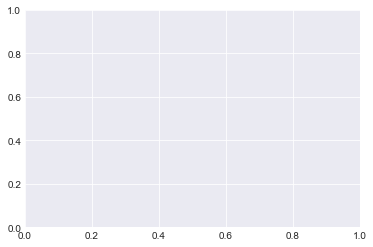

In [54]:
create_lineplots_by_dataset(data=distance_from_truth_results, dataset='olivetti', metric='truth_dist')

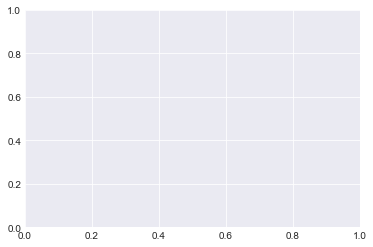

In [55]:
create_lineplots_by_dataset(data=distance_from_truth_results, dataset='mnist')

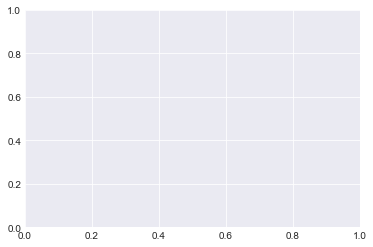

In [56]:
create_lineplots_by_dataset(data=distance_from_truth_results, dataset='fmnist')

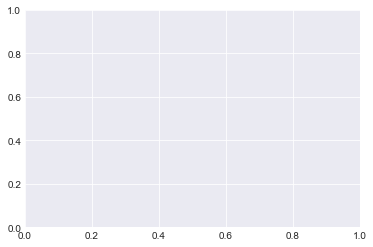

In [57]:
create_lineplots_by_dataset(data=distance_from_truth_results, dataset='olivetti', sampling='stratified')

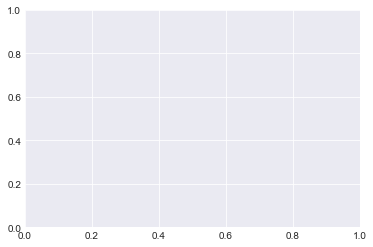

In [58]:
create_lineplots_by_dataset(data=distance_from_truth_results, dataset='mnist', sampling='stratified')

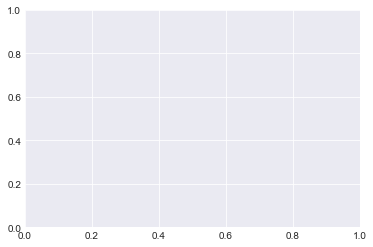

In [59]:
create_lineplots_by_dataset(data=distance_from_truth_results, dataset='fmnist', sampling='stratified')